In [1]:
#all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from xgboost import XGBClassifier
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.model_selection import StratifiedKFold

import statsmodels.api as sm

-----------------------------------------------------------------------------------------------
#    "Understanding  and cleaning the data"
Here we will check for:

        1. Extracting and cleaning columns
        2. Dealing with NULL values
        3. Permanently dropping some columns
        4. Encoding categorical columns 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. *Data Exploration*

In [3]:
train.head(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Quick insights:

1. Passenger IDs have followance -- sign of being with family (new varibale = with_family)
2. Cabin values show signs of being in a certain part or floor or deck of the ship (new varible = split the values into 3 columns)

### -- Checking missing values

In [4]:
perc_missing_train = train.isnull().sum() * 100 / len(train)
missing_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': perc_missing_train,
                                 'Dtype': train.dtypes})
missing_train[missing_train['percent_missing'] != 0]

,column_name,percent_missing,Dtype
HomePlanet,HomePlanet,2.312205,object
CryoSleep,CryoSleep,2.496261,object
Cabin,Cabin,2.289198,object
Destination,Destination,2.093639,object
Age,Age,2.059128,float64
VIP,VIP,2.335212,object
RoomService,RoomService,2.082135,float64
FoodCourt,FoodCourt,2.105142,float64
ShoppingMall,ShoppingMall,2.392730,float64
Spa,Spa,2.105142,float64


In [5]:
perc_missing_test = test.isnull().sum() * 100 / len(test)
missing_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': perc_missing_test,
                                 'Dtype': test.dtypes})
missing_test[missing_test['percent_missing'] != 0]

,column_name,percent_missing,Dtype
HomePlanet,HomePlanet,2.034136,object
CryoSleep,CryoSleep,2.174421,object
Cabin,Cabin,2.338087,object
Destination,Destination,2.151040,object
Age,Age,2.127660,float64
VIP,VIP,2.174421,object
RoomService,RoomService,1.917232,float64
FoodCourt,FoodCourt,2.478373,float64
ShoppingMall,ShoppingMall,2.291326,float64
Spa,Spa,2.361468,float64


### -- Investigation features

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


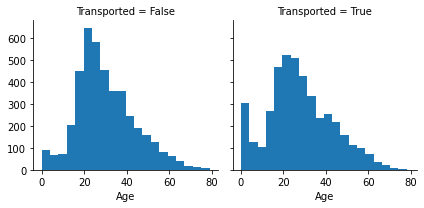

----------------------------------------


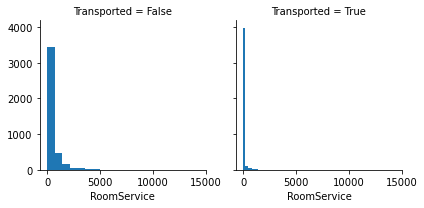

----------------------------------------


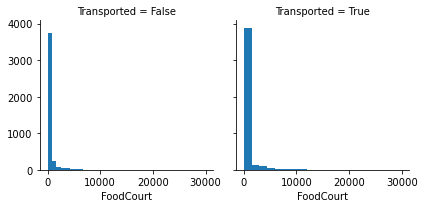

----------------------------------------


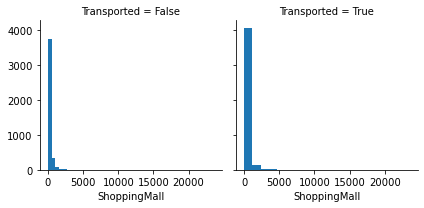

----------------------------------------


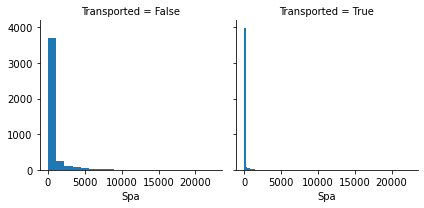

----------------------------------------


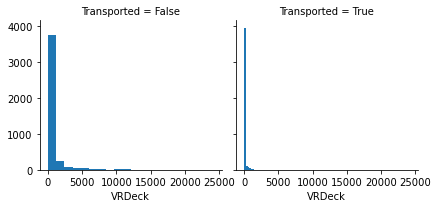

----------------------------------------


In [7]:
for col in train:
    if train[col].dtype == float:
        facet = sns.FacetGrid(train, col='Transported')
        facet.map(plt.hist, col, bins = 20)
        plt.show()
        print('-' * 40)
    else:
        pass


In [8]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
train['Transported'] = np.where(train['Transported'] == False, 0, 1)

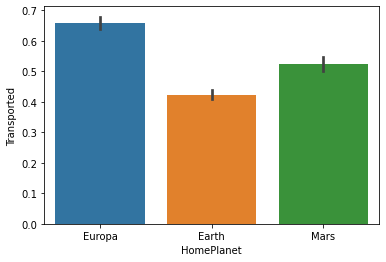

----------------------------------------


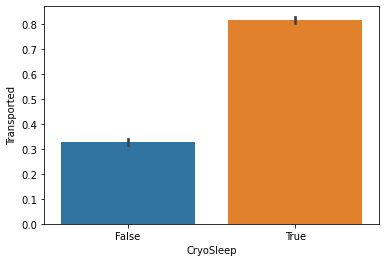

----------------------------------------


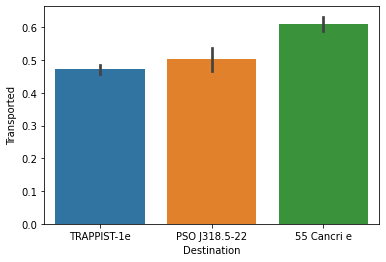

----------------------------------------


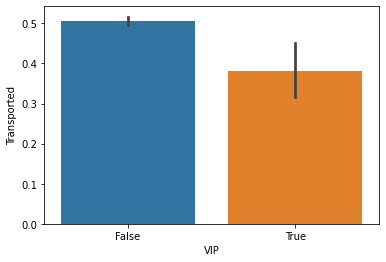

----------------------------------------


In [10]:
for col in train:
    if train[col].dtype == object:
        if train[col].nunique() <= 10:
            sns.barplot(x = train[col], y = train['Transported'])
            plt.show()
            print('-' * 40)

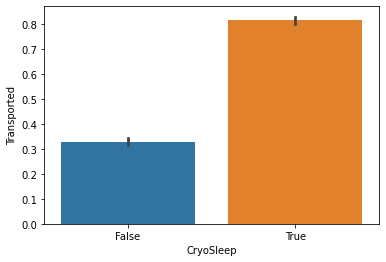

In [11]:
sns.barplot(x = 'CryoSleep', y = 'Transported', data = train)
plt.show()

## 2. *Null Values*

In [12]:
df = [train, test]

In [13]:
perc_missing_train = train.isnull().sum() * 100 / len(train)
missing_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': perc_missing_train,
                                 'Dtype': train.dtypes})
missing_train[missing_train['percent_missing'] != 0]

,column_name,percent_missing,Dtype
HomePlanet,HomePlanet,2.312205,object
CryoSleep,CryoSleep,2.496261,object
Cabin,Cabin,2.289198,object
Destination,Destination,2.093639,object
Age,Age,2.059128,float64
VIP,VIP,2.335212,object
RoomService,RoomService,2.082135,float64
FoodCourt,FoodCourt,2.105142,float64
ShoppingMall,ShoppingMall,2.392730,float64
Spa,Spa,2.105142,float64


In [14]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [15]:
# categorical values

for dataset in df:

    ## HOMEPLANET
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0], inplace = True)
    
    ## CRYOSLEEP
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0], inplace = True)

    ## CABIN
    dataset['Cabin'].fillna(dataset['CryoSleep'].mode()[0], inplace = True)

    ## DESTINATION
    dataset['Destination'].fillna(dataset['Destination'].mode()[0], inplace = True)

    ## VIP
    dataset['VIP'].fillna(dataset['VIP'].mode()[0], inplace = True)


In [16]:
# numerical values

for dataset in df:

    ## AGE
    dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

    ## RoomService
    dataset['RoomService'].fillna(dataset['RoomService'].mean(), inplace = True)

    ## FoodCourt
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].mean(), inplace = True)

    ## ShoppingMall
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].mean(), inplace = True)
    
    ## Spa
    dataset['Spa'].fillna(dataset['Spa'].mean(), inplace = True)
    
    ## VRDeck
    dataset['VRDeck'].fillna(dataset['VRDeck'].mean(), inplace = True)

# FEATURE ENGINEERING

## 1. *Extracting Features*

In [17]:
## Creating a feature using Cabin -- splitting them to get deck and side number

def cabin_cleaner(df):
    new = df["Cabin"].str.split("/", n = 1, expand = True)
    new1 = new[1].str.split("/", n = 1, expand = True)

    df["Cabin_deck"] = new[0]
    df["Cabin_number"] = new1[0]
    df["Cabin_side"] = new1[1]
    df.drop(["Cabin"], axis = 1, inplace = True)
    df['Cabin_number'] = df['Cabin_number'].astype(float)
    df.drop(["Cabin_number"], axis = 1, inplace = True)
    return(df)

cabin_cleaner(train)
cabin_cleaner(test)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_side
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,P
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,P


In [18]:
train.groupby(['Cabin_deck']).mean()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Cabin_deck,,,,,,,,,
A,0.265625,34.939263,0.136719,137.427493,1545.117791,114.812907,693.250000,930.368258,0.496094
B,0.537869,33.542700,0.053915,87.898510,1246.200261,153.543753,721.258484,746.272474,0.734275
C,0.393574,34.740164,0.054886,181.324717,1802.711882,175.526272,912.465006,1067.863604,0.680054
D,0.217573,33.410266,0.064854,665.189464,590.208567,309.111489,469.943395,288.626365,0.433054
E,0.191781,30.040592,0.017123,310.796806,270.382512,229.652278,271.879722,242.130265,0.357306
F,0.196850,28.437038,0.010379,307.091247,153.063357,238.011006,168.334862,149.991761,0.439871
G,0.527550,24.170778,0.000000,76.707799,87.384922,74.043075,94.240413,81.780829,0.516217
T,0.000000,37.000000,0.000000,427.200000,1397.400000,35.145834,2008.400000,883.000000,0.200000


In [19]:
## Creating a new feature to see if someone is part of a family or alone on board

def passengerid_cleaner(df):
    new = df['PassengerId'].str.split("_", n = 1, expand = True)
    df['PassengerIN'] = new[0]
    df['PassengerUN'] = new[1]
    df.drop(['PassengerId', 'PassengerUN'], axis = 1, inplace = True)

passengerid_cleaner(train)
passengerid_cleaner(test)


for dataset in df:
    dataset['DUP'] = dataset['PassengerIN'].duplicated().astype(str)
    dataset['DUP1'] = dataset['PassengerIN'].duplicated(keep = 'last').astype(str)
    dataset['DUP'] = dataset['DUP'].map({ 'True':1, 'False':0})
    dataset['DUP1'] = dataset['DUP1'].map({ 'True':1, 'False':0})
    dataset['WithFamily'] = np.where(dataset['DUP'] + dataset['DUP1'] != 0, 1, 0)
    dataset.drop(['PassengerIN', 'DUP', 'DUP1'], axis = 1, inplace = True)

In [20]:
## A feature according to total expenditure

for dataset in df:
    dataset['TotalExpenditure'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']

In [21]:
## Another feature outlining if someone spent any money

for dataset in df:
    dataset['SpentMoney'] = np.where(dataset['TotalExpenditure'] == 0, 0, 1)

In [22]:
dataset.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_side,WithFamily,TotalExpenditure,SpentMoney
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S,0,0.0,0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S,0,2832.0,1
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S,0,0.0,0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S,0,7418.0,1
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S,0,645.0,1


In [23]:
## Creating Expenditure BINS

for dataset in df:
    dataset['AgeGroup'] = pd.qcut(dataset['Age'].rank(method='first'), 5)

In [24]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'Cabin_deck', 'Cabin_side', 'WithFamily', 'TotalExpenditure',
       'SpentMoney', 'AgeGroup'],
      dtype='object')

## 2. *Dropping Features*

In [25]:
Dropper_1 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
for dataset in df:
    dataset.drop(Dropper_1, axis = 1, inplace = True)

In [26]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'Cabin_deck', 'Cabin_side', 'WithFamily', 'TotalExpenditure',
       'SpentMoney', 'AgeGroup'],
      dtype='object')

## 3. *Getting Dummies*

In [27]:
for dataset in df:
    dataset['CryoSleep'] = dataset['CryoSleep'].astype(str)
    dataset['VIP'] = dataset['VIP'].astype(str)

# get dummies aka encoding
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
#df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

---------------------------------------------------------------------------------------------------------------------------
### Quick Exploration

In [28]:
train.drop('TotalExpenditure', axis = 1, inplace = True)
test.drop('TotalExpenditure', axis = 1, inplace = True)

In [29]:
train.columns

Index(['Transported', 'WithFamily', 'SpentMoney', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_True', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_side_S', 'AgeGroup_(1739.4, 3477.8]',
       'AgeGroup_(3477.8, 5216.2]', 'AgeGroup_(5216.2, 6954.6]',
       'AgeGroup_(6954.6, 8693.0]'],
      dtype='object')

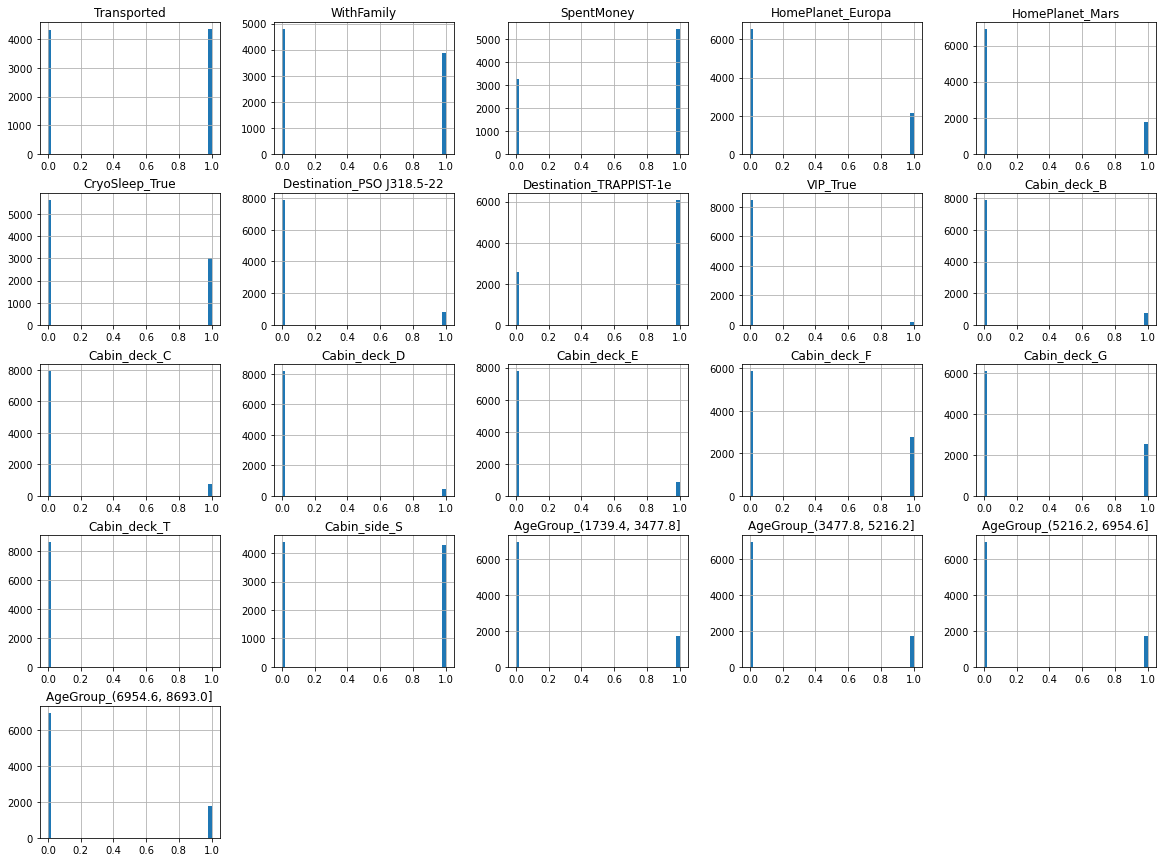

In [30]:
#checking for distribution of the data

train.hist(bins=50, figsize=(20,15))
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------
# Feature Selection

Starting from this point the focus will be on selecting the best features for this model
I am going to employee several methods to see what can be done and then dynamically select the features that will be included in our model
    
        1.  Mutual information score
        2.  Correlation analysis
        3.  PCA
        4.  Exploratory

In [31]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns.values]
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [32]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(0, inplace = True)

In [33]:
X = train.drop('Transported', axis = 1)
y = train['Transported']

In [34]:
train

,Transported,WithFamily,SpentMoney,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Cabin_deck_B,...,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,"AgeGroup_(1739.4, 3477.8_","AgeGroup_(3477.8, 5216.2_","AgeGroup_(5216.2, 6954.6_","AgeGroup_(6954.6, 8693.0_"
0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
2,0,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8689,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
8690,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
8691,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [35]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,CryoSleep_True,1.607033
2,HomePlanet_Europa,0.605876
9,Cabin_deck_C,0.602261
8,Cabin_deck_B,0.509814
15,Cabin_side_S,0.475115
12,Cabin_deck_F,0.395290
10,Cabin_deck_D,0.131900
3,HomePlanet_Mars,0.123163
0,WithFamily,0.020078
11,Cabin_deck_E,-0.143206


<AxesSubplot:>

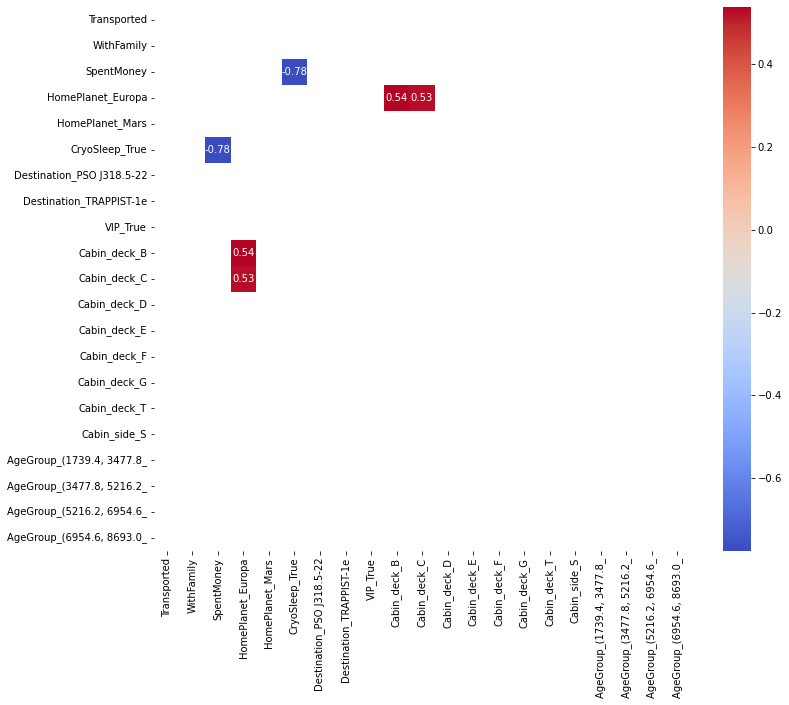

In [36]:
# Correlation Analysis in R style
rho = train.corr(method ='pearson')
pval = train.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

# visualization but only if it is more than 0.5
min_corr = 0.5
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(12, 10))
sns.heatmap(kot, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True)) 

In [37]:
# Compilation Code

from sklearn import feature_selection
feature_model = pd.DataFrame(X.columns.tolist(), columns = ['Feature'])

# 1. Mutual Information Classifier

from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X, y, random_state = 100)
mi_score = pd.DataFrame(mi_score)

unimp_mic = pd.DataFrame(X.columns.tolist(), columns = ['Column'])
unimp_mic['MIC_Score'] = mi_score

# 2. Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10)
etc.fit(X, y)
unimp_mic['Tree_Score'] = etc.feature_importances_.tolist()

# 3. Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
importance = logreg.coef_[0]
unimp_mic['Log_Reg'] = importance.tolist()

# 4. XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
unimp_mic['XGBoost'] = xgb.feature_importances_.tolist()

# Final Compilation

unimp_mic = unimp_mic.fillna(0)

feature_model['Mutual_Info'] = np.where(unimp_mic['MIC_Score'] < 0.03, 1, 0)
feature_model['Extra_Tree'] = np.where(unimp_mic['Tree_Score'] < 0.03, 1, 0)
feature_model['Log_Reg'] = np.where(unimp_mic['Log_Reg'] < 0.03, 1, 0)
feature_model['XGBoost'] = np.where(unimp_mic['XGBoost'] < 0.03, 1, 0)

feature_model['Final_Drop'] = feature_model['Mutual_Info'] + feature_model['Extra_Tree'] + feature_model['Log_Reg'] + feature_model['XGBoost']
# Drop list

model_drop_list = (feature_model[feature_model['Final_Drop'] == 4]['Feature']).tolist()
model_drop_list

['WithFamily',
 'Destination_PSO J318.5-22',
 'VIP_True',
 'Cabin_deck_T',
 'AgeGroup_(1739.4, 3477.8_',
 'AgeGroup_(3477.8, 5216.2_',
 'AgeGroup_(5216.2, 6954.6_',
 'AgeGroup_(6954.6, 8693.0_']

# Modelling Part

In [38]:
X1 = train.drop(model_drop_list, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# All the code imports

import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Models to test

algorithm = ['XGBoost Classifier',
             'Random Forest Classifier', 
             'Logistic Regression',
             'KNeighbour Classifier',
             'Support Vector Machines',
             'Gradient Boosting Classifier'
          ]

accuracy = []
precision = []
recall = []
f1_score = []

#Code  1 -- Without hyparameter optimization

#XGBClassifer
xg_model1 = XGBClassifier()
xg_model1.fit(X_train, y_train)
y_pred_xg = xg_model1.predict(X_test)


xg_accuracy1 = accuracy_score(y_test, y_pred_xg) * 100
xg_confusion1 = confusion_matrix(y_test, y_pred_xg)
xg_precision1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[1][0]) * 100
xg_recall1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[0][1]) * 100
xg_f1_score1 = ((2 * xg_precision1 * xg_recall1) / (xg_precision1 + xg_recall1)) / 100

accuracy.append(round(xg_accuracy1, 2))
precision.append(round(xg_precision1, 2))
recall.append(round(xg_recall1, 2))
f1_score.append(round(xg_f1_score1, 4))


# Random Forest Classifier
rfc_model1 = RandomForestClassifier()
rfc_model1.fit(X_train, y_train)
y_pred_rf = rfc_model1.predict(X_test)

rf_accuracy1 = accuracy_score(y_test, y_pred_rf) * 100
rf_confusion1 = confusion_matrix(y_test, y_pred_rf)
rf_precision1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[1][0]) * 100
rf_recall1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[0][1]) * 100
rf_f1_score1 = ((2 * rf_precision1 * rf_recall1) / (rf_precision1 + rf_recall1)) / 100

accuracy.append(round(rf_accuracy1, 2))
precision.append(round(rf_precision1, 2))
recall.append(round(rf_recall1, 2))
f1_score.append(round(rf_f1_score1, 4))


# Logistic Regression
lr_model1 = LogisticRegression(
#    class_weight='dict', 
    max_iter=1000, random_state=42)
lr_model1.fit(X_train, y_train)
y_pred_lr = lr_model1.predict(X_test)

lr_accuracy1 = accuracy_score(y_test, y_pred_lr) * 100
lr_confusion1 = confusion_matrix(y_test, y_pred_lr)
lr_precision1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[1][0]) * 100
lr_recall1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[0][1]) * 100
lr_f1_score1 = ((2 * lr_precision1 * lr_recall1) / (lr_precision1 + lr_recall1)) / 100

accuracy.append(round(lr_accuracy1, 2))
precision.append(round(lr_precision1, 2))
recall.append(round(lr_recall1, 2))
f1_score.append(round(lr_f1_score1, 4))

# KNN Classifier 
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)

knn_accuracy1 = accuracy_score(y_test, y_pred_knn) * 100
knn_confusion1 = confusion_matrix(y_test, y_pred_knn)
knn_precision1 = knn_confusion1[0][0]/(knn_confusion1[0][0] + knn_confusion1[1][0]) * 100
knn_recall1 = knn_confusion1[0][0]/(knn_confusion1[0][0] + knn_confusion1[0][1]) * 100
knn_f1_score1 = ((2 * knn_precision1 * knn_recall1) / (knn_precision1 + knn_recall1)) / 100

accuracy.append(round(knn_accuracy1, 2))
precision.append(round(knn_precision1, 2))
recall.append(round(knn_recall1, 2))
f1_score.append(round(knn_f1_score1, 4))

# Support Vector Machines
svm_model1 = SVC()
svm_model1.fit(X_train, y_train)
y_pred_svm = svm_model1.predict(X_test)

svm_accuracy1 = accuracy_score(y_test, y_pred_svm) * 100
svm_confusion1 = confusion_matrix(y_test, y_pred_svm)
svm_precision1 = svm_confusion1[0][0]/(svm_confusion1[0][0] + svm_confusion1[1][0]) * 100
svm_recall1 = svm_confusion1[0][0]/(svm_confusion1[0][0] + svm_confusion1[0][1]) * 100
svm_f1_score1 = ((2 * svm_precision1 * svm_recall1) / (svm_precision1 + svm_recall1)) / 100

accuracy.append(round(svm_accuracy1, 2))
precision.append(round(svm_precision1, 2))
recall.append(round(svm_recall1, 2))
f1_score.append(round(svm_f1_score1, 4))

# Gradient Boosting Classifier
gbc_model1 = GradientBoostingClassifier()
gbc_model1.fit(X_train, y_train)
y_pred_gbc = gbc_model1.predict(X_test)

gbc_accuracy1 = accuracy_score(y_test, y_pred_gbc) * 100
gbc_confusion1 = confusion_matrix(y_test, y_pred_gbc)
gbc_precision1 = gbc_confusion1[0][0]/(gbc_confusion1[0][0] + gbc_confusion1[1][0]) * 100
gbc_recall1 = gbc_confusion1[0][0]/(gbc_confusion1[0][0] + gbc_confusion1[0][1]) * 100
gbc_f1_score1 = ((2 * gbc_precision1 * gbc_recall1) / (gbc_precision1 + gbc_recall1)) / 100

accuracy.append(round(gbc_accuracy1, 2))
precision.append(round(gbc_precision1, 2))
recall.append(round(gbc_recall1, 2))
f1_score.append(round(gbc_f1_score1, 4))

metric = pd.DataFrame({
    'Alogrithms':algorithm,
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'F1 Score':f1_score
})
metric

c:\Users\aishj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Alogrithms,Accuracy,Precision,Recall,F1 Score
0,XGBoost Classifier,73.08,69.32,81.69,0.7500
1,Random Forest Classifier,73.01,71.88,81.69,0.7647
2,Logistic Regression,72.24,69.50,78.12,0.7356
3,KNeighbour Classifier,70.94,69.86,72.46,0.7113
4,Support Vector Machines,73.85,70.33,81.46,0.7549
5,Gradient Boosting Classifier,73.54,70.50,79.91,0.7491


## 1. *Optimization of modelling*

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

model = GradientBoostingClassifier()
parameters = {"learning_rate"   : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                "subsample"    : sp_randFloat(),
                "n_estimators" : sp_randInt(100, 1000),
                "max_depth"    : sp_randInt(4, 10)
                }


randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                            cv = 5, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm.best_estimator_)
print(" The best score across ALL searched params: ", randm.best_score_)
print(" The best parameters across ALL searched params: ", randm.best_params_)


op_randm = randm.best_estimator_
op_randm.fit(X_train, y_train)
pred = op_randm.predict(X_test)
acc = accuracy_score(y_test, pred)

 Results from Random Search 
 The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=0.001, max_depth=8, n_estimators=166,
                           subsample=0.12069279594262472)
 The best score across ALL searched params:  0.751684470008217
 The best parameters across ALL searched params:  {'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 166, 'subsample': 0.12069279594262472}


In [42]:
final_test = op_randm.predict(test)
final_test = pd.DataFrame(final_test, columns=['Transported'])
final_test

c:\Users\aishj\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AgeGroup_(1711.4, 2566.6_
- AgeGroup_(2566.6, 3421.8_
- AgeGroup_(3421.8, 4277.0_
- AgeGroup_(856.2, 1711.4_
Feature names seen at fit time, yet now missing:
- AgeGroup_(1739.4, 3477.8_
- AgeGroup_(3477.8, 5216.2_
- AgeGroup_(5216.2, 6954.6_
- AgeGroup_(6954.6, 8693.0_

  warnings.warn(message, FutureWarning)


,Transported
0,1
1,0
2,1
3,1
4,0
...,...
4272,1
4273,0
4274,1
4275,0


In [43]:
test1 = pd.read_csv('test.csv')
test2 = test1['PassengerId']
test3 = pd.DataFrame(test2)
test3['Transported'] = final_test
test3['Transported'] = np.where(test3['Transported'] == 0, 'False', 'True')
test3

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [44]:
test3.to_csv('1.6.csv', index=False)